In [6]:
!pip install tensorflow numpy matplotlib scikit-learn seaborn


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [8]:
# Define dataset path
dataset_path = "./minet"  # Folder containing subdirectories of rock types

# Image Data Augmentation & Splitting
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

# Load Training Data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load Validation Data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Print class labels
print("Class Labels:", train_generator.class_indices)


Found 768 images belonging to 7 classes.
Found 189 images belonging to 7 classes.
Class Labels: {'biotite': 0, 'bornite': 1, 'chrysocolla': 2, 'malachite': 3, 'muscovite': 4, 'pyrite': 5, 'quartz': 6}


In [9]:
# Define CNN model
model = Sequential([
    Input(shape=(128, 128, 3)),  # Correct way to define input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,543 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10  # Removed workers & multiprocessing (not needed)
)

# Save the trained model
model.save('rock_cnn_modelinlab6.h5')


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 529ms/step - accuracy: 0.2186 - loss: 2.0167 - val_accuracy: 0.3598 - val_loss: 1.4893
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.3746 - loss: 1.4308 - val_accuracy: 0.5397 - val_loss: 1.2424
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 442ms/step - accuracy: 0.5615 - loss: 1.2067 - val_accuracy: 0.5556 - val_loss: 1.1412
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 466ms/step - accuracy: 0.6182 - loss: 1.0411 - val_accuracy: 0.6508 - val_loss: 0.9406
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 451ms/step - accuracy: 0.6780 - loss: 0.9130 - val_accuracy: 0.7090 - val_loss: 0.8543
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.7654 - loss: 0.6943 - val_accuracy: 0.6349 - val_loss: 0.9623
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - accuracy: 0.7391 - loss: 0.7119 - val_accuracy: 0.6878 - val_loss: 0.8116
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 558ms/step - accuracy: 0.7670 - loss: 0.6266 - val_accu

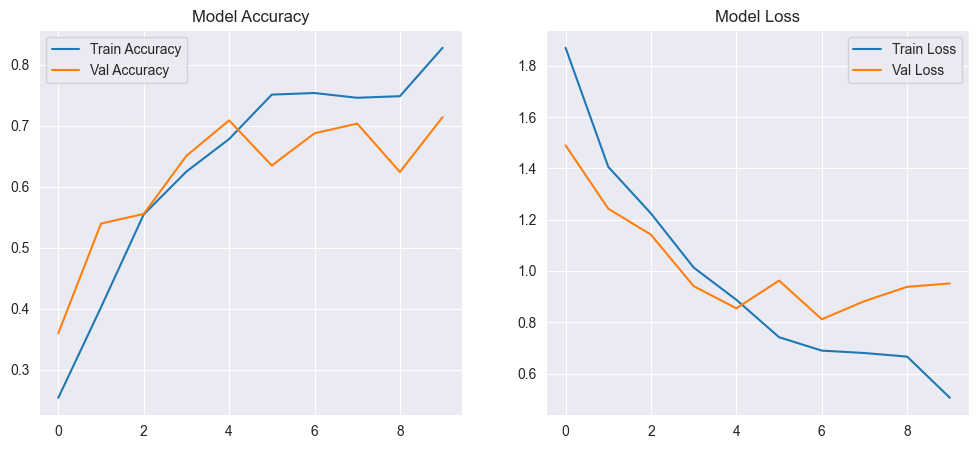

In [11]:
# Plot training history
plt.figure(figsize=(12,5))

# Plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [16]:
model_cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,545 (12.61 MB)

 Trainable params: 3,305,543 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# ✅ Provide the path to an image from your dataset
image_path = "./minet/biotite/0066.jpeg"  # Change this to your actual image path

# ✅ Load the image and preprocess it
img = image.load_img(image_path, target_size=(128, 128))  # Ensure this matches your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input shape
img_array /= 255.0  # Normalize (if your model expects it)

# ✅ Initialize the model properly with the actual image
model_cnn(img_array)


<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[9.9999356e-01, 9.6492393e-08, 6.9585058e-09, 6.3246321e-06,
        3.1948009e-08, 2.0094170e-08, 1.5025543e-08]], dtype=float32)>

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
import cv2
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the trained CNN model
model_cnn = tf.keras.models.load_model('rock_cnn_modelinlab6.h5')

# Select the feature extraction layer (last convolutional layer)
feature_layer_name = "conv2d_8"  # Ensure this matches your model
feature_extractor = Model(inputs=model_cnn.input, outputs=model_cnn.get_layer(feature_layer_name).output)

# Load an image from your dataset
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))  # Ensure it matches the model input size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Example: Extract features from a dataset folder
dataset_path = "./minet"
train_features = []
train_labels = []

for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = preprocess_image(img_path)
            features = feature_extractor.predict(img)
            train_features.append(features.flatten())  # Flatten the feature map
            train_labels.append(label)

# Convert to numpy arrays
train_features = np.array(train_features)
train_labels = np.array(train_labels)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(train_features, train_labels)

# Test the classifier with a validation image
test_img_path = "./minet/biotite/0066.jpeg"
test_img = preprocess_image(test_img_path)
test_features = feature_extractor.predict(test_img).flatten()
predicted_label = svm_classifier.predict([test_features])

print(f"Predicted Label: {predicted_label}")


AttributeError: The layer sequential_2 has never been called and thus has no defined input.